# Predicting Heart Disease 



**OVERVIEW**

In this application, we will explore a dataset from the cleveland database of the UCI Machine Learning Repository. The original database contains 76 attributes and only 14 attributes are intended to be used. The goal of this exercise is to train a machine learning model that predicts the outcome of whether the patient may have a heart disease or not with a great deal of accuracy. 

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

For predicting whether a patient has heart disease or not, it is vital to understand some of the key features that will be used to train the model. With that in mind, here are some that are of key interest to us. 
- age 
- sex
- cp (chest pain type)
- trestbps - resting blood pressure
- chol - cholestrol
- serum 
- fbs - fasting blood sugar
- restecg - resting electrocardiographic results
- thalach - maximum heart rate
- exang - exercised induced angina
- oldpeak
- slope
- ca
- thal - thalium stress result
- target - predicted attribute (1 = yes; 0 = no) 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

A dataset of approximately 303 rows was provided for this assignment. A comprehensive data quality assessment will be performed after analyzing the dataset.  This includes 
- Good understanding of the columns
- Choice of selection of the most relevant columns that will improve model accuracy
- Not needed columns
- Sufficient number of observations
- Duplicate records
- outliers
- missing values and how to deal with them
- Any bias in the data


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [75]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#Read the dataset
df = pd.read_csv("data/Heart_disease_cleveland_new.csv")
print(df.head())
df.shape



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


(303, 14)

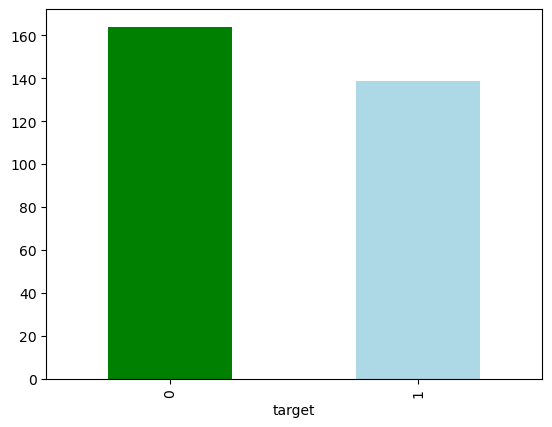

In [7]:

#Count positive and negative counts 
df.target.value_counts()

# Plot the value_counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["green", "lightblue"]);



df.info() shows some quick info on what kind of data we are working with, missing values etc


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [12]:
# find out any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Lets do some analysis on the prediction values based on the gender 


In [13]:
df.sex.value_counts()

sex
1    206
0     97
Name: count, dtype: int64

The above indicates there are 206 males and 97 females in our study 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

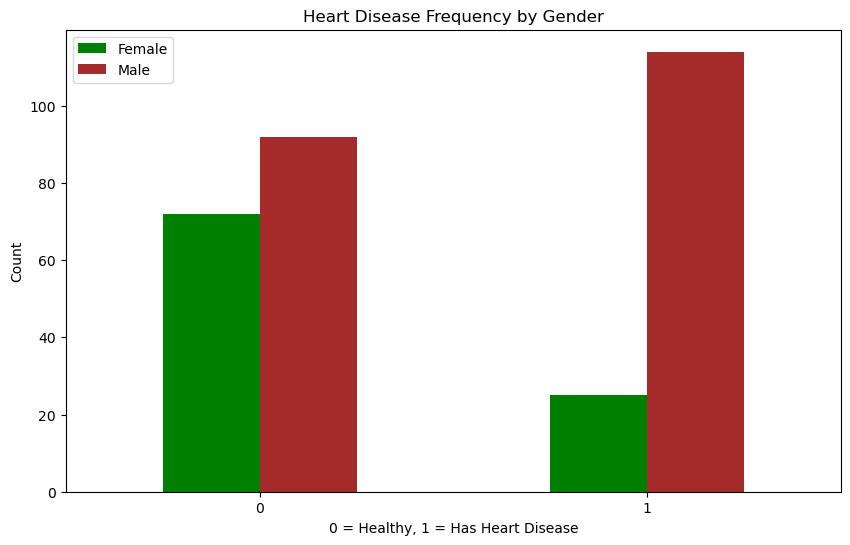

In [15]:
pd.crosstab(df.target, df.sex)

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["green", "brown"])

plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = Healthy, 1 = Has Heart Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

Based on the above the % of males having a heart disease is about 50% where as for females its 75%. Averaging that out the chances of having a heart disease for either gender is about 62.5%. Lets hope we can beat this using our model.  

##### Comparing the target with age and maximum heart rate (talach) 


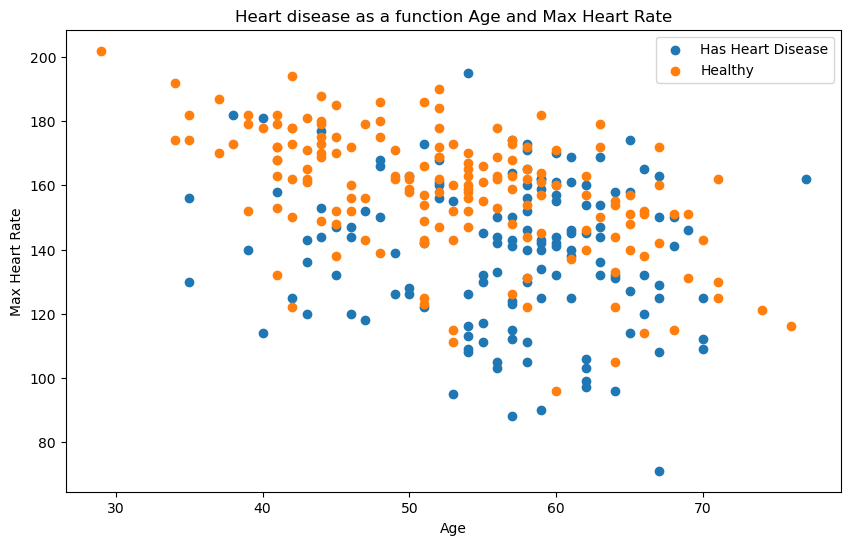

In [16]:

plt.figure(figsize=(10, 6))

# positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])

# negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])

# Add some helpful info
plt.title("Heart disease as a function Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Has Heart Disease", "Healthy"])

Based on the above plots, we can infer that someone who is younger has a higher heart rate and someone older has a lower heart rate (see the distribution of points above). Lets check the age distribution further. 

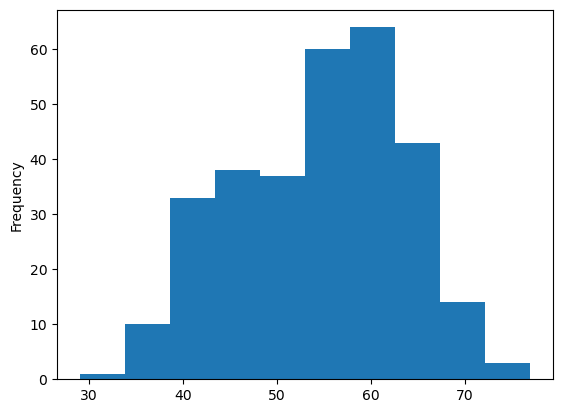

In [18]:
# Age distribution Histogram. Shows a normal distribution (to the right)
df.age.plot.hist();

### Correlation Between Independent Variables

This analysis will help us validate which independent variables may or may not impact the target variable. We can do this using df.corr() which will provide the correlation matrix that helps us analyze the dependencies. 

In [19]:
# Find the correlation 
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


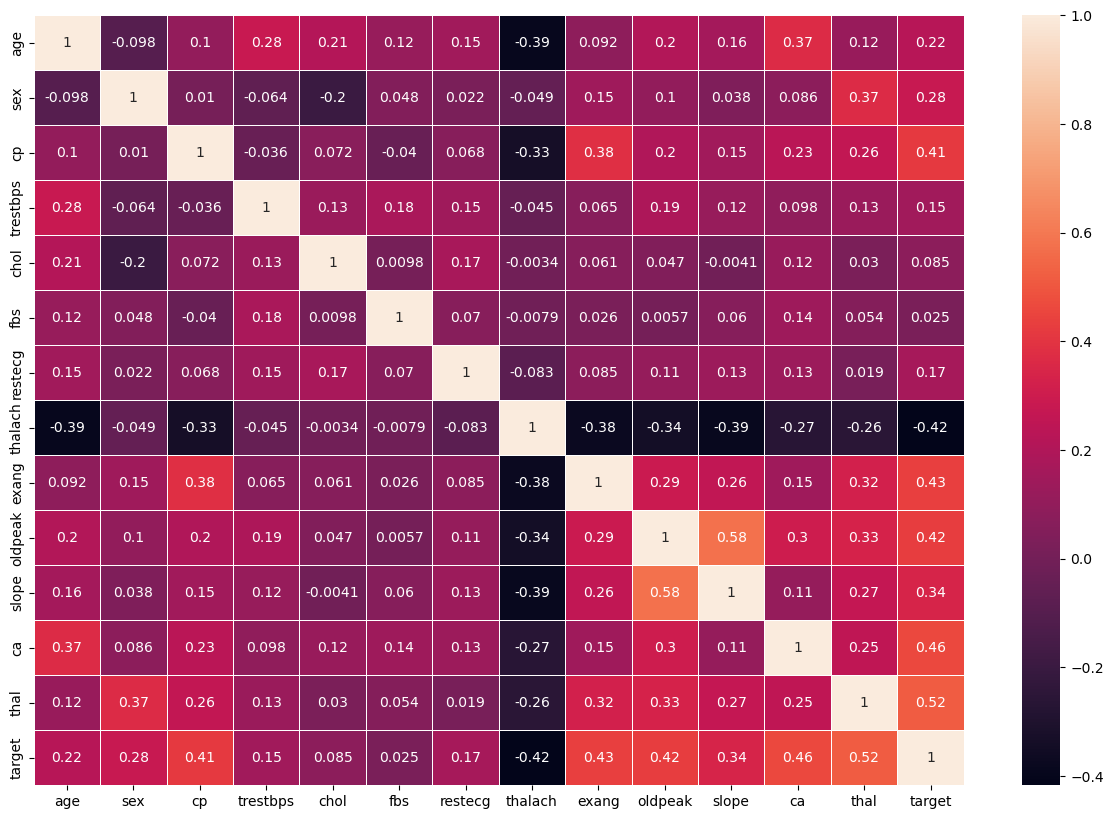

In [21]:
# colorful correlation matrix
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5)

 
### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
##This step dropping the target variable from the data set and creating the test/traininig splits
X = df.drop("target", axis=1)
# Target variable
y = df["target"]

np.random.seed(42)

# Split into train and test set - 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print out the test and training samples
np.array(y_train), len(y_train)
np.array(y_test), len(y_test)

(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]),
 61)

### 1. Logistic Regression

This is going to be one of the first models we are going to evaluate among others. Abstracting away some of the methods for re-usability

In [24]:
# Store the models in a dictionary and initialize them 
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/Users/krishnaa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.9180327868852459,
 'Random Forest': 0.8688524590163934}

## Accuracy of the Model 

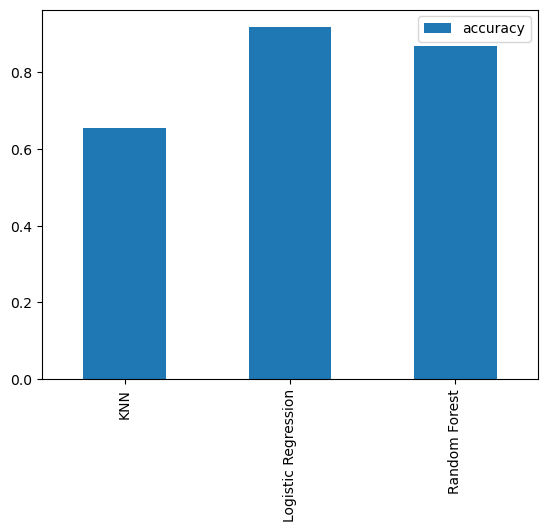

In [26]:
models_accuracy = pd.DataFrame(model_scores, index=["accuracy"])
models_accuracy.T.plot.bar();

### Hyperparameter Tuning and Cross-Validation 

#### Tuning KNeighbors Classifier


In this section, we will attempt to tune the model by modifying number of neighbors value which by default is set to n=5. Further, we will train the model using KNeighbors with different values of neighbors and checking thier scores

In [28]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for neighbors
neighbors = range(1, 26)  # 1 to 25

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i)  

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [30]:
# print all the scores

train_scores


[1.0,
 0.78099173553719,
 0.7603305785123967,
 0.7603305785123967,
 0.7479338842975206,
 0.7231404958677686,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.6818181818181818,
 0.7066115702479339,
 0.7107438016528925,
 0.6859504132231405,
 0.6900826446280992,
 0.6694214876033058,
 0.6776859504132231,
 0.6735537190082644,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579,
 0.6818181818181818,
 0.6735537190082644,
 0.6859504132231405,
 0.6694214876033058,
 0.6818181818181818]

In [31]:
test_scores

[0.6065573770491803,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7540983606557377,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869]

In [27]:
Drawing some visualizations around the scores above to better understand how they look and identify the impacts. 

Maximum KNN score on the test data: 75.41%


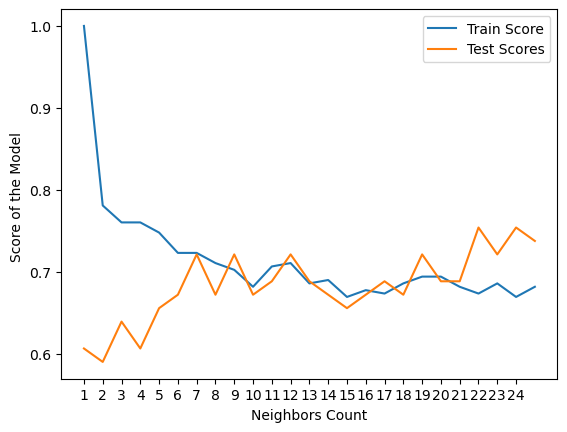

In [33]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Neighbors Count")
plt.ylabel("Score of the Model ")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


Looking at the results above, it appears that when the neighbors count of 11 is supplied, the model score are the most performant. However this model did not perform as well as the LogisticRegression or the RandomForestClassifier. Given this, it makes sense to ignore the KNN and focus on the above mentioned methodologies using RandomizedSearchCV. 

### Model Tuning Using RandomizedSearchCV

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on prediction of heart disease. Our next goal now is to find the different hyperparameters we can tune. 

In [34]:
# LogisticRegression - HyperParameters
logistic_reg = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# RandomForestClassifier - HyperParameters
random_forest = { "n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Using RandomizedSearchCV and tune this model. Setting the number of iterations to 20 and pass the different hyperparameters. 

In [35]:

# Setup random seed
np.random.seed(42)

# Logistic Regression Hyperparameter
log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=logistic_reg,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
log_reg.score(X_test, y_test)

0.9016393442622951

Lets continue tuning the model using RandomizedSearchCV for RandomForestClassifier. 

In [39]:
# RandomForestClassifier
# Setup random seed
np.random.seed()

# RandomForestClassifier - HyperParameters
random_for = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_forest,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model
random_for.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [41]:
random_for.best_params_

{'n_estimators': 610,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [42]:
random_for.score(X_test, y_test)

0.9016393442622951

The above two scores look promising. Looks like tuning the hyperparameters for each model yielded a slight performance improvement using both RandomForestClassifier and LogisticRegression. The next step would be to try out using GridSearchCV> 

### Model Tuning Using GridSearchCV 


GridSearchCV offers a way to test every single combination (while RandomSearchCV searches only over the iteration combinations). 

In [43]:
# Hyperparameters
grid_logistic_reg = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Hyperparameter search
hyp_search_grid = GridSearchCV(LogisticRegression(),
                         param_grid=grid_logistic_reg,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
hyp_search_grid.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
# check the hyperparameters
hyp_search_grid.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [45]:
# Evaluate the score
hyp_search_grid.score(X_test, y_test)

0.9016393442622951

This gives us the same score as the RandomizedSearchCV since our grid has a maximum of only 20 hyperparameters. 

## Evaluating the classification model

In [46]:
# predictions with the tuned model 
y_predictions = hyp_search_grid.predict(X_test)
y_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [47]:
# comparing the predictions with the test 
np.array(y_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

Let's continue with the ROC curve.

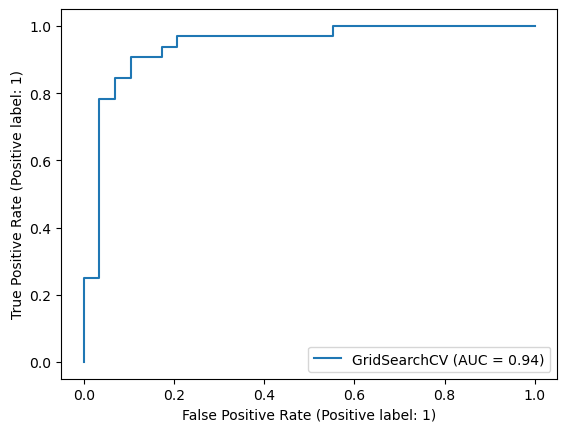

In [53]:
# Plot ROC curve 
RocCurveDisplay.from_estimator(hyp_search_grid, X_test, y_test)

Not bad, a perfect using achieves a AUC score of 1.0 so there's scope for improvement. Lets move onto the confusion matrix. 

[[26  3]
 [ 3 29]]


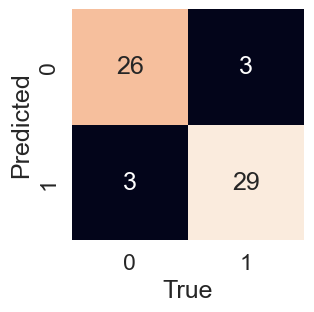

In [58]:
print(confusion_matrix(y_test, y_predictions))
# visualize this further 

sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
    """
    Plots confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
plot_confusion_matrix(y_test, y_predictions)

The above graph indicates there are 3 occasions where the model predicted 0 when it should have been 1 (false -ve) and 3 occasions when it predicted 1 instead of 0 (false +ve)

In [60]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [61]:
# Identify the best hyperparameters
log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
# Create a new classifier 
new_clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

# identify cross validator accuracy
cv_acc = cross_val_score(new_clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

# take the mean 
cv_acc = np.mean(cv_acc)
cv_acc

0.8348087431693989

In [65]:
# Cross validated precision
cv_precision = cross_val_score(new_clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8525922266139657

In [66]:
# Cross-validated recall
cv_recall = cross_val_score(new_clf, 
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7835978835978835

In [67]:
# Cross_validated F1-score
cv_f1 = cross_val_score(new_clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8116050834126753

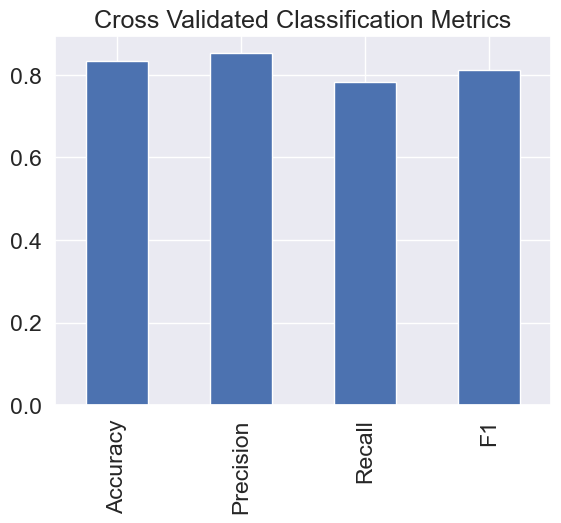

In [68]:
# Now visualize
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                     legend=False);

Lets identify which features are the most important/significant
For our problem, trying to predict heart disease using a patient's medical characteristics, which of them contribute the most to the model predicting whether someone has heart disease or not?

In [73]:
# Fit a logistic regresion instance
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")
clf.fit(X_train, y_train);

# Map coefficient features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.025962749852583237,
 'sex': 0.6563095168591484,
 'cp': 0.3495075410347415,
 'trestbps': 0.009437659394268848,
 'chol': 0.0046292865148726,
 'fbs': -0.18526538757024985,
 'restecg': 0.1523968898995156,
 'thalach': -0.0305987159706332,
 'exang': 0.48780833389599165,
 'oldpeak': 0.33806095189648516,
 'slope': 0.2952512532355336,
 'ca': 1.0184797910755659,
 'thal': 0.5657092156537724}

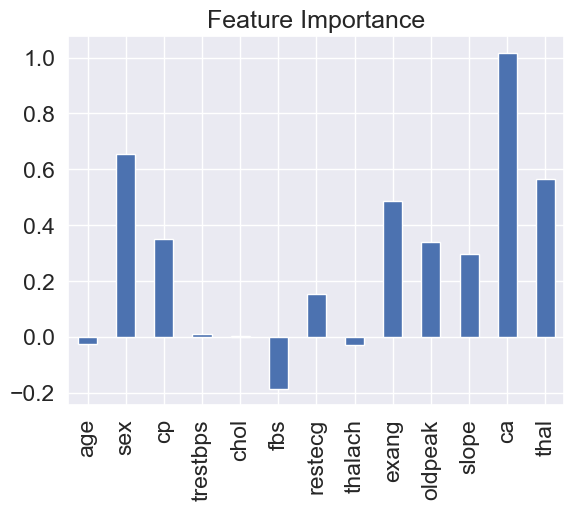

In [74]:
# Visualize 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If certain features provide significantly more value than others, it may alter the way you gather data for various problems. By focusing on the most valuable features, you can reduce the number of features your model needs to analyze, while enhancing those that offer the most impact. This can lead to computational savings, as the model processes fewer features without compromising performance.

### Evaluation
With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. 

### Data Quality Issues
The quality of the data provided could be greatly improved - data was limited that affected the accuracy of the model overall. Additionally, patient data is sensitive and hence needs to be handled carefully.

### Model Observations
The key objective of the problem was to identify a set of key features for predicting heart disease. We ran several models containing a rich set of features along with their correlation matrix between features and prediction. The logisticregression model performed better. 

### Deployment
Now that we've settled on our models and findings, it is time to deliver the information. 

The analysis was performed over nearly 200 patient results/tests. Its possible we may need more data than what was provided as part of the evaluation. There is a chance we could have got better results using different modeling techniques. 


In Summary, the following features were considered to train the model

age
sex
cp (chest pain type)
trestbps - resting blood pressure
chol - cholestrol
serum
fbs - fasting blood sugar
restecg - resting electrocardiographic results
thalach - maximum heart rate
exang - exercised induced angina
oldpeak
slope
ca
thal - thalium stress result


I think RandomClassifier is the most suitable deployment model here based on the results shown above. 